In [44]:
#Import required libraries
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

%matplotlib inline

In [45]:
#Import the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
#Descriptive Statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**There seems to be no outliers in the data since there are no extreme values as seen in the descriptive statistics above.**

In [47]:
#Datatypes
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


**Gender is a categorical datatype and should be converted to numerical values since Unsupervised learning relies only on numerical data.**

## **Data Pre processing**

### **Dropping the CustomerID column:**
CustomerID is a unique identifier for each customer, so it doesn't provide meaningful information for grouping. Including it in clustering could distort the results, as each ID is distinct and irrelevant to customer characteristics

In [48]:
## Step 1: Drop the CustomerID column as it's not relevant for clustering
df = df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### **Encoding the Gender column:**

Gender is categorical, and clustering algorithms require numerical data. We used label encoding to convert it to numerical form (1 for Male, 0 for Female in this case). Encoding allows the clustering algorithm to incorporate gender in segmenting customers based on similar attributes.

In [49]:
# Step 2: Encode the Gender column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

### **Dropping the null values** (if there are any)

In [50]:
#Drop the null values
df.dropna(inplace=True)
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### **Dropping the duplicates**

In [51]:
#Drop duplicates
df.drop_duplicates(inplace=True)

## **Data Visualization**


Let’s start by creating some visualizations to explore the relationships between different features.

1. Distribution plots to understand the spread of each feature.
2. Pair plots to see how features like Age, Annual Income, and Spending Score relate to each other, potentially highlighting natural groupings.
3. Gender-based insights to check for any differences in spending and income patterns between genders.

### **Histograms**

<ipython-input-52-5907d7b349f9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2', ax=axes[1, 1])


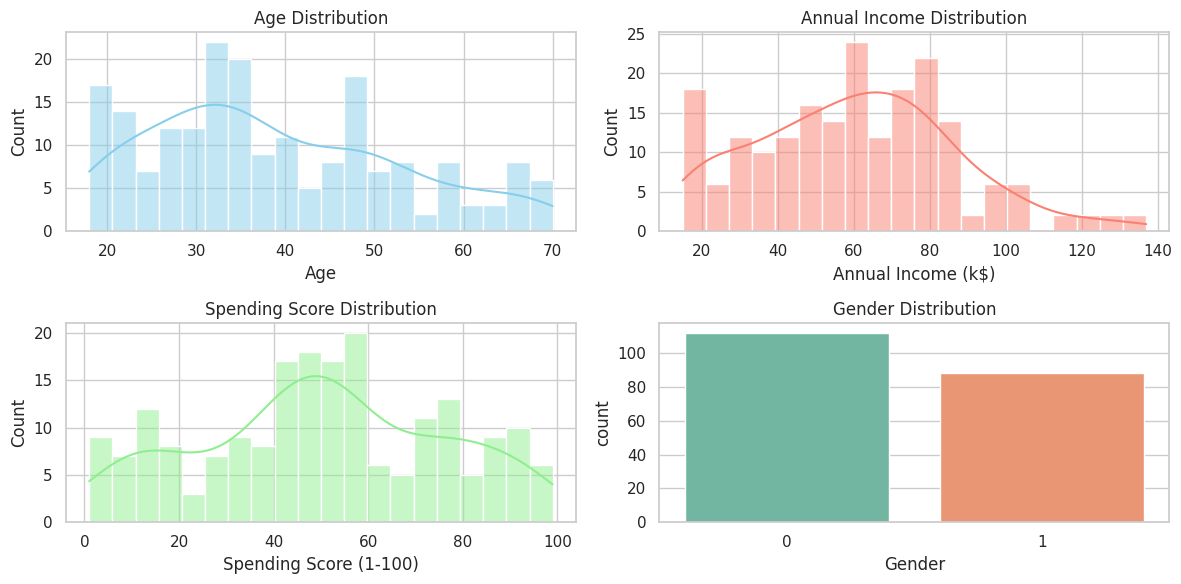

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualization
sns.set(style="whitegrid")

# Create a figure to hold subplots
fig, axes = plt.subplots(2, 2, figsize=(12,6))

# Distribution plots for Age, Annual Income, and Spending Score
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Spending Score Distribution')

sns.countplot(x='Gender', data=df, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution')



plt.tight_layout()
plt.show()

### Insights:

**1. Age Range:** Customers range broadly in age, with a concentration between 20 and 40 years old. This age group forms the core demographic.

**2. Income Range:** The majority of customers have annual incomes between 40k$ and 80k, with the income distribution being fairly symmetric.Despite variations in income, there is not a direct, linear correlation between income and spending score. This indicates that high income does not necessarily translate to high spending scores, meaning that customer spending behavior might be influenced by factors other than income alone.

**3. Spending Scores:** The spending scores range widely, with a notable concentration around mid-to-high scores. This means that a significant number of customers are active spenders, providing an opportunity for upselling and cross-selling.


### **Box plot**

<ipython-input-53-227cdf2cc455>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Annual Income (k$)'], palette='viridis')


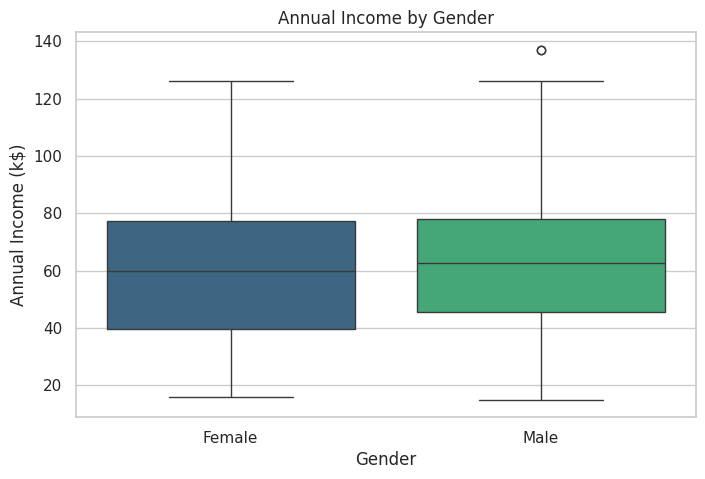

In [53]:
plt.figure(figsize=(8, 5))

# Boxplot of Annual Income by Gender
sns.boxplot(x=df['Gender'], y=df['Annual Income (k$)'], palette='viridis')
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.xticks([0, 1], ['Female', 'Male'])  # Assuming 0 = Female, 1 = Male from encoding
plt.show()


**Insights:**

**Income by Gender:** Both male and female customers have a similar income distribution, with females showing slightly higher median income. This implies that gender alone may not significantly affect income levels.

### **Correlation Analysis**

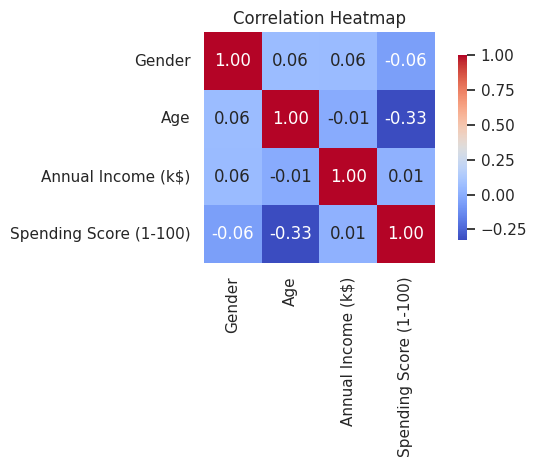

In [54]:
# Correlation heatmap to show relationships between features
plt.figure(figsize=(6,3))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.show()


### **Insights:**
1. There is a negative correlation between age and spending score suggest that younger customers tend to spend more, while older customers are more conservative in their spending.
2. Weak correlations between features indicate their independence, which is ideal for clustering.

### **Visualizing Age vs. Spending Score**

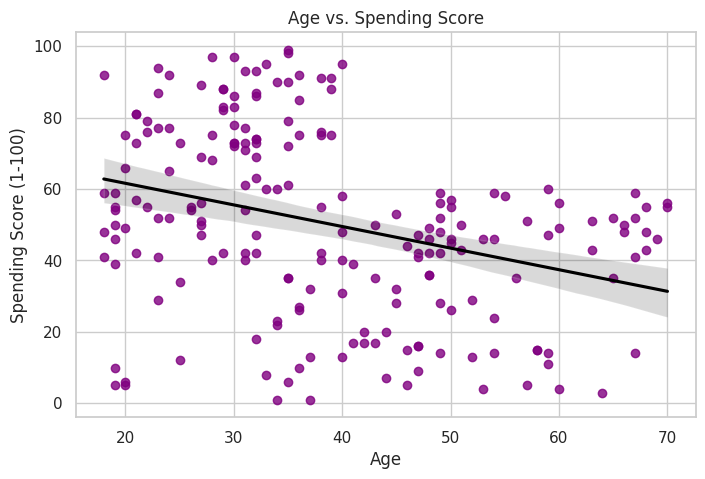

In [55]:
# Scatter plot with regression line for Age vs. Spending Score
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Spending Score (1-100)', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'black'})
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


### **Gender-Based Spending and Income Scatter Plots**

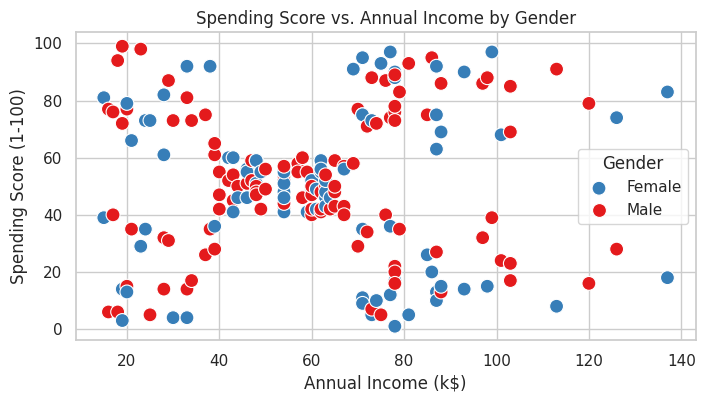

In [56]:
# Scatter plot for Spending Score vs. Annual Income, separated by gender
plt.figure(figsize=(8,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set1', s=100)
plt.title('Spending Score vs. Annual Income by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', labels=['Female', 'Male'])  # Adjust if encoding is known
plt.show()


### **Potential Segments:**

**1. Low Income, High Spending:** This group (bottom-left corner) might indicate customers with low income but high spending scores, possibly due to lifestyle choices or priorities.

**2. High Income, Low Spending:** This represent high-income customers who are conservative in spending, indicating potential for upselling.

**3. Moderate Income, Moderate Spending:** These individuals represent a balanced profile, **likely making up a large part of the customer base.**

**Gender Differences:**

1. The points are well distributed between genders across income and spending score, with no significant difference in spending habits by gender.
2. Both genders are fairly evenly represented in each segment, suggesting that **gender may not be a major differentiator in spending behavior within these income levels.**

### **Feature Scaling - Standardization**

Since we are working with features like Age, Annual Income, and Spending Score, it's crucial to apply feature scaling to ensure that all features are on a similar scale, which is especially important for distance-based algorithms like K-means clustering.



In [57]:
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns for scaling, use actual column names
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Corrected column names
scaler = StandardScaler()

# Applying scaling to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Displaying the scaled data
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


# Model Building

- Apply K-Means Clustering.
- Apply Hierarchical Clustering.


## K-Means Clustering
- Elbow Method

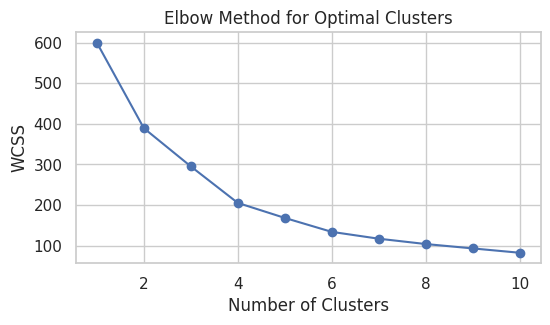

In [64]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[features_to_scale])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,3))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


The "elbow point" is observed around 4 clusters, where the rate of decrease in WCSS starts to diminish. This suggests that 5 clusters might be optimal for segmenting the customers. Lets build a k means with k=4

### Next Steps:
- Fit the K-Means model with 4 clusters.
- Visualize the clusters.
- Evaluate the clustering quality using the Silhouette Score.

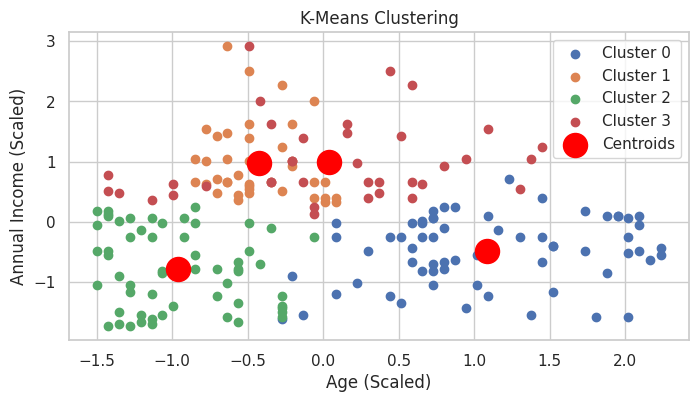

0.4039582785148566

In [72]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features_to_scale])

# Visualize clusters
plt.figure(figsize=(8,4))
for cluster in range(4):
    plt.scatter(
        df[df['Cluster'] == cluster]['Age'],
        df[df['Cluster'] == cluster]['Annual Income (k$)'],
        label=f'Cluster {cluster}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age (Scaled)')
plt.ylabel('Annual Income (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the clustering quality using Silhouette Score
silhouette_avg = silhouette_score(df[features_to_scale], df['Cluster'])
silhouette_avg

- The silhouette score is 0.417, indicating moderate clustering quality. While the clusters are somewhat well-separated, there may be some overlap, which could be refined using other techniques.
-  Let's try out the **Principal Component Analysis** later to reduce dimensionality and see if we can increase the cluster quality.

# **Hierarchical Clustering**

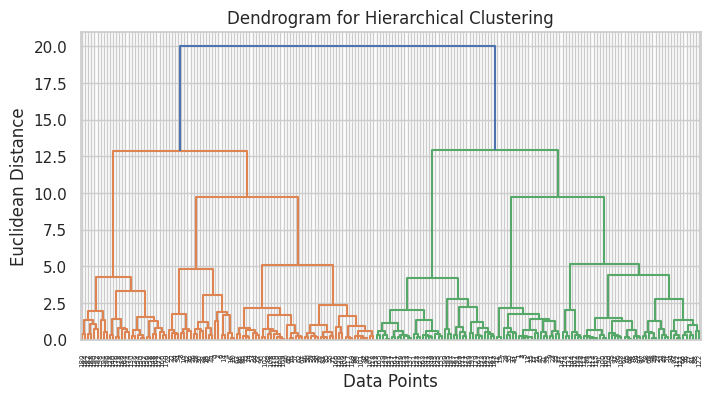

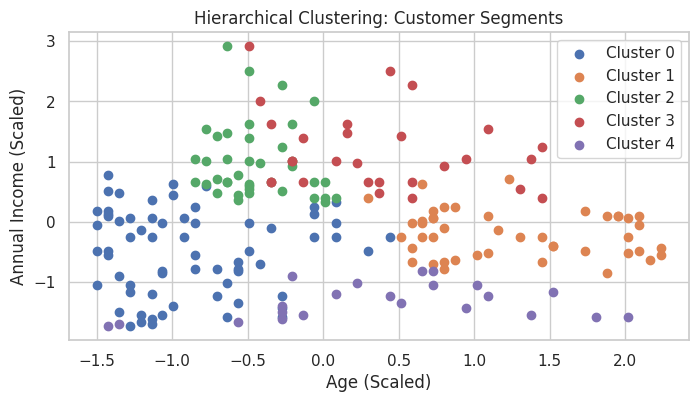

0.39002826186267214

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Step 1: Perform Hierarchical Clustering using Ward's Method
linked = linkage(df[features_to_scale], method='ward')

# Step 2: Plot the Dendrogram
plt.figure(figsize=(8,4))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Step 3: Apply Agglomerative Clustering with 5 clusters (based on dendrogram observation)
hierarchical_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical_model.fit_predict(df[features_to_scale])

# Visualize Hierarchical Clusters
plt.figure(figsize=(8,4))
for cluster in range(5):
    plt.scatter(
        df[df['Hierarchical_Cluster'] == cluster]['Age'],
        df[df['Hierarchical_Cluster'] == cluster]['Annual Income (k$)'],
        label=f'Cluster {cluster}'
    )
plt.title('Hierarchical Clustering: Customer Segments')
plt.xlabel('Age (Scaled)')
plt.ylabel('Annual Income (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate clustering using Silhouette Score
hierarchical_silhouette = silhouette_score(df[features_to_scale], df['Hierarchical_Cluster'])
hierarchical_silhouette


### Dendrogram Analysis:

- The dendrogram indicates how data points are merged step by step into clusters based on Euclidean distance.
- A cut-off point at approximately 5 clusters was selected, based on the largest vertical separation in the dendrogram.

- The silhouette score is 0.390, slightly lower than K-Means (0.417), indicating slightly less distinct clusters but still providing meaningful separations.

#Principal Component Analysis

- Principal Component Analysis (PCA) can help reduce the dimensionality of the dataset and potentially improve the clustering results by projecting the data onto a lower-dimensional space where clusters may become more distinct.

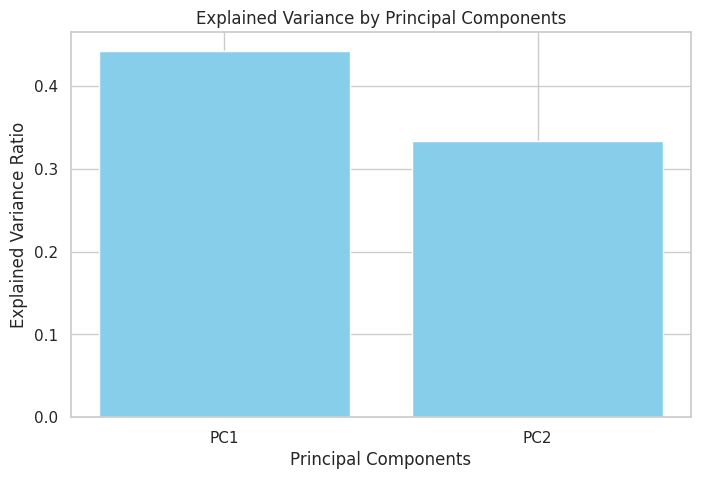

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


In [61]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df[features_to_scale])

# Visualizing the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), pca.explained_variance_ratio_, tick_label=['PC1', 'PC2'], color='skyblue')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Displaying the first few rows of the PCA-transformed data
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df.head()


- PC1 explains ~44% of the variance in the data.
- PC2 explains ~37% of the variance.

- Together, the first two components explain ~81% of the total variance, indicating they capture most of the information in the data.

**Now's lets try building the K-Means clustering algorithm since it has the highest clustering score of the two and see if the cluster distinction improves.**

# K-Means Clustering On PCA-Transformed Data

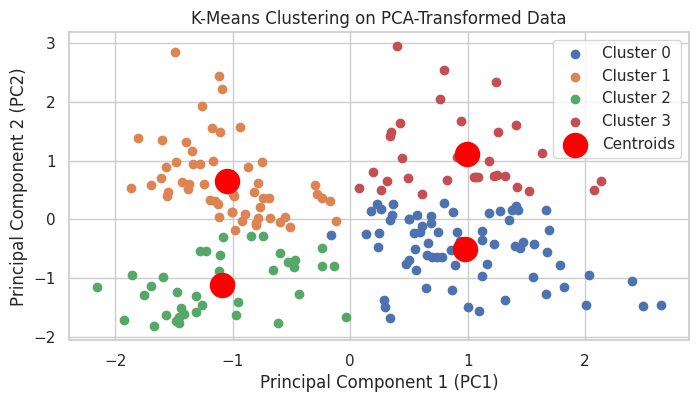

0.4209286031083799

In [70]:
# Apply K-Means on PCA-transformed data with 4 clusters
kmeans_pca = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
pca_df['KMeans_Cluster'] = kmeans_pca.fit_predict(pca_df[['PC1', 'PC2']])

# Visualize the K-Means clusters in PCA space
plt.figure(figsize=(8,4))
for cluster in np.unique(pca_df['KMeans_Cluster']):
    plt.scatter(
        pca_df[pca_df['KMeans_Cluster'] == cluster]['PC1'],
        pca_df[pca_df['KMeans_Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}'
    )
# Plot centroids
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Silhouette Score for K-Means on PCA-transformed data
kmeans_pca_silhouette = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['KMeans_Cluster'])

kmeans_pca_silhouette

**Insights:**
- The K-Means clusters are visibly distinct and interpretable in the PCA-transformed space.
- The silhoutte score is also good as compared to the original model.

# K Means Cluster Analysis

In [75]:
# Summary for K-Means Clusters
# Add the 'KMeans_Cluster' column to the original DataFrame 'df'
df['KMeans_Cluster'] = df['Cluster']
kmeans_summary = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
kmeans_summary['Cluster Size'] = df['KMeans_Cluster'].value_counts()
kmeans_summary

,Age,Annual Income (k$),Spending Score (1-100),Cluster Size
KMeans_Cluster,,,,
0,1.086161,-0.490565,-0.397174,65
1,-0.428806,0.974847,1.216085,40
2,-0.962492,-0.784763,0.392030,57
3,0.037205,0.990115,-1.188757,38


## **Summary of Priorities**

| **Cluster** | **Priority**       | **Reason**                                                                                  | **Key Strategies**                                                                                     |
|-------------|--------------------|---------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Cluster 2** | **High Priority**   | High-income, high-spending customers. Significant revenue potential.                        | Focus on luxury products, exclusive memberships, and personalized marketing campaigns.                |
| **Cluster 1** | **Medium Priority** | Low-to-moderate income, moderate spenders. Can be nurtured into more loyal customers.        | Use affordable deals, flash sales, and trendy campaigns on social media.                              |
| **Cluster 3** | **Medium Priority** | High-income, low-spending conservative customers.                                            | Highlight value-driven, durable products and personalized recommendations to increase spending.        |
| **Cluster 0** | **Low Priority**    | Older, low-income, low-spending customers. Limited ROI potential.                           | Budget-focused messaging and minimal investment in resources.                                         |

---

## **Final Recommendations**
1. **Focus on Cluster 2 (High Value)**:
   - These customers are the most valuable, with high income and high spending habits.
   - Prioritize them for **premium campaigns** and **luxury product promotions**.

2. **Engage Cluster 1 (Young and Promising)**:
   - This is the largest cluster and has decent spending behavior.
   - Use **discount campaigns and social media** to engage them effectively.

3. **Convert Cluster 3 (Potential Upsell)**:
   - These are high-income, low-spending customers.
   - Focus on **value propositions** to encourage increased spending.

4. **Maintain Clusters 0**:
   - These customers provide limited ROI.
   - Focus on **basic engagement** with minimal investment in campaigns.

---

### **Key Action Items**
- Allocate marketing budgets based on the **priority levels** of each cluster.
- Tailor strategies for each cluster to maximize engagement and ROI.
- Combine **premium offerings for high-value clusters** with cost-effective campaigns for lower-priority clusters.
